In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import seaborn as sns

%matplotlib inline

## -------------------------- Load and Read Dataset -----------------------------

In [13]:
# Load Dataset
cnr=pd.read_csv('data.csv')
cnr.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [14]:
cnr.shape

(569, 32)

## ----------------- Encoding categorical data values -----------------------

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(cnr['diagnosis'])
label

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

#####  so here 1 is malignant , 0 is benign

In [16]:
# appending converted column in our original dataframe
cnr['diagnosis']=label
cnr.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [17]:
# ID is not required in analysis

cnr=cnr.drop(['id'],axis=1)
cnr.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## ----------------------------------------- predictor and target --------------------------

In [18]:
# droping diagnosis column
X=cnr.drop(['diagnosis'],axis=1)
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [19]:
y=cnr.diagnosis
y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int32

## --------------------- train validation and split -----------------------------------------

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [21]:
#train validation split
X_train,X_valid,y_train,y_valid=train_test_split(X_train,y_train,test_size=0.25)

In [22]:
X_train.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
325,12.670,17.30,81.25,489.9,0.10280,0.07664,0.03193,0.02107,0.1707,0.05984,...,13.71,21.10,88.70,574.4,0.1384,0.1212,0.1020,0.05602,0.2688,0.06888
565,20.130,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.69,38.25,155.00,1731.0,0.1166,0.1922,0.3215,0.16280,0.2572,0.06637
505,9.676,13.14,64.12,272.5,0.12550,0.22040,0.11880,0.07038,0.2057,0.09575,...,10.60,18.04,69.47,328.1,0.2006,0.3663,0.2913,0.10750,0.2848,0.13640
515,11.340,18.61,72.76,391.2,0.10490,0.08499,0.04302,0.02594,0.1927,0.06211,...,12.47,23.03,79.15,478.6,0.1483,0.1574,0.1624,0.08542,0.3060,0.06783
137,11.430,15.39,73.06,399.8,0.09639,0.06889,0.03503,0.02875,0.1734,0.05865,...,12.32,22.02,79.93,462.0,0.1190,0.1648,0.1399,0.08476,0.2676,0.06765


## ---------------- data exploration ------------------------------------

In [23]:
# checking how much null values are present 

X_train.isnull().sum()

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [27]:
X_train.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,...,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.00000,341.000000
mean,14.102364,19.444985,91.798592,652.020528,0.095703,0.104669,0.089027,0.048252,0.181343,0.062827,...,16.213724,25.911730,106.921173,874.031672,0.132118,0.259644,0.277368,0.114421,0.29094,0.084578
std,3.526847,4.335716,24.380270,355.303555,0.013975,0.054915,0.081933,0.039343,0.027540,0.007069,...,4.835944,6.153715,33.705159,571.886663,0.023411,0.170212,0.220800,0.068218,0.06201,0.019600
min,7.729000,10.380000,47.920000,178.800000,0.052630,0.019380,0.000000,0.000000,0.106000,0.050240,...,8.952000,12.490000,56.650000,240.100000,0.071170,0.027290,0.000000,0.000000,0.15650,0.055040
25%,11.670000,16.320000,74.680000,416.200000,0.085080,0.062210,0.029560,0.020360,0.162700,0.058210,...,12.980000,21.330000,84.420000,513.100000,0.114800,0.144000,0.110100,0.062960,0.25000,0.071460
50%,13.340000,18.910000,86.490000,546.400000,0.094910,0.092280,0.059280,0.031320,0.179800,0.061810,...,14.910000,25.500000,97.590000,684.600000,0.131200,0.210100,0.226400,0.098040,0.28180,0.079440
75%,15.710000,21.820000,103.600000,761.700000,0.104900,0.130500,0.122600,0.070170,0.195400,0.066210,...,18.490000,29.940000,125.100000,1031.000000,0.146300,0.351100,0.396500,0.166700,0.31960,0.092180
max,28.110000,33.810000,188.500000,2501.000000,0.144700,0.311400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.218400,1.058000,1.252000,0.290300,0.66380,0.207500


##### As seen above most the features are skewed

## ------------------------------------------- data visualization -----------------------------------------

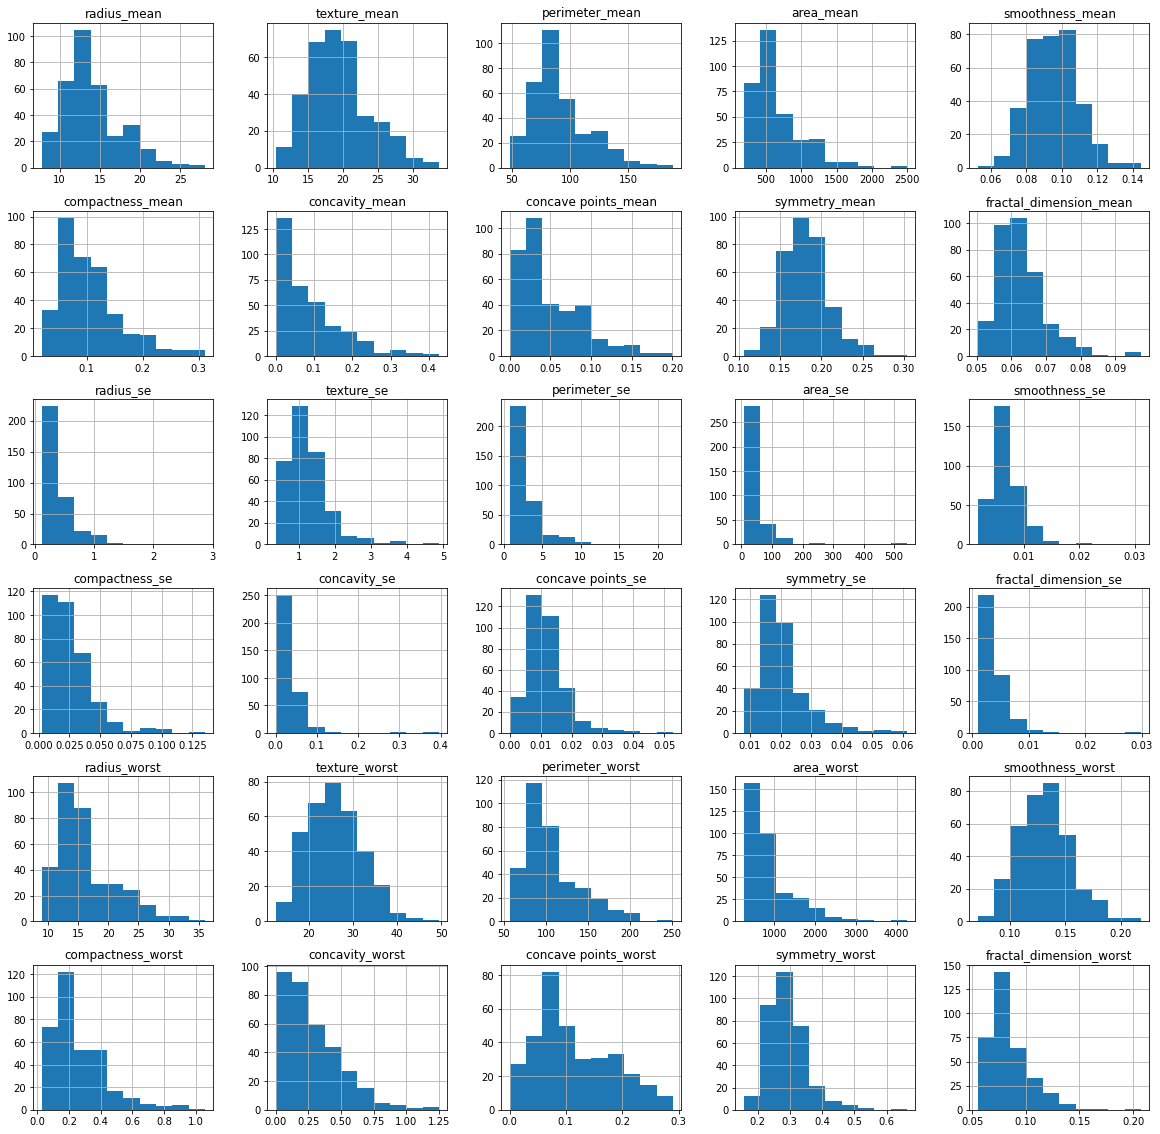

In [29]:
# we can infer the counts of each feature with the help of histogram

X_train.hist(bins=10,figsize=(20,20))
plt.show()

<AxesSubplot:xlabel='area_mean', ylabel='smoothness_mean'>

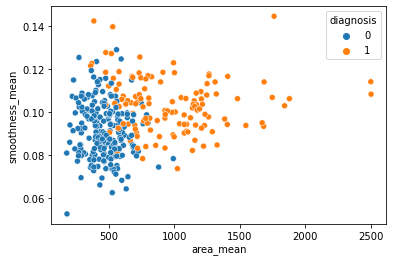

In [25]:
sns.scatterplot(x='area_mean',y='smoothness_mean',hue=y_train,data =X_train)

In [30]:
# finding corelation between each variables

X_train.corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.316458,0.997915,0.985865,0.232888,0.525347,0.669035,0.817487,0.167375,-0.266660,...,0.971272,0.284111,0.967028,0.944539,0.169749,0.397617,0.500440,0.724993,0.141599,0.031497
texture_mean,0.316458,1.000000,0.324619,0.317897,-0.022443,0.254475,0.298501,0.288585,0.062895,-0.048325,...,0.338983,0.906184,0.351266,0.333402,0.064813,0.287732,0.300622,0.280641,0.101670,0.140214
perimeter_mean,0.997915,0.324619,1.000000,0.985006,0.269444,0.574335,0.707434,0.846187,0.203411,-0.217403,...,0.971022,0.293366,0.972273,0.944480,0.201712,0.439744,0.537554,0.753345,0.169007,0.075111
area_mean,0.985865,0.317897,0.985006,1.000000,0.229871,0.509734,0.678153,0.815189,0.167386,-0.244514,...,0.960636,0.273445,0.957227,0.961578,0.160963,0.366721,0.482031,0.697607,0.113493,0.020345
smoothness_mean,0.232888,-0.022443,0.269444,0.229871,1.000000,0.686125,0.578902,0.605845,0.559935,0.593544,...,0.264393,0.041346,0.288715,0.245902,0.817787,0.511938,0.502667,0.574573,0.429898,0.531145
compactness_mean,0.525347,0.254475,0.574335,0.509734,0.686125,1.000000,0.882817,0.848289,0.621209,0.577914,...,0.555762,0.284816,0.611423,0.520801,0.609108,0.872767,0.828501,0.845826,0.553576,0.700916
concavity_mean,0.669035,0.298501,0.707434,0.678153,0.578902,0.882817,1.000000,0.918694,0.536224,0.378666,...,0.680684,0.306415,0.721992,0.666771,0.501866,0.744615,0.880240,0.860862,0.439050,0.535953
concave points_mean,0.817487,0.288585,0.846187,0.815189,0.605845,0.848289,0.918694,1.000000,0.505466,0.218002,...,0.829480,0.292697,0.856778,0.805723,0.506316,0.664613,0.744920,0.910178,0.403432,0.399273
symmetry_mean,0.167375,0.062895,0.203411,0.167386,0.559935,0.621209,0.536224,0.505466,1.000000,0.524198,...,0.208461,0.086397,0.244473,0.194895,0.454649,0.491082,0.467697,0.484870,0.694824,0.463245
fractal_dimension_mean,-0.266660,-0.048325,-0.217403,-0.244514,0.593544,0.577914,0.378666,0.218002,0.524198,1.000000,...,-0.209267,-0.004534,-0.161320,-0.197888,0.528855,0.502509,0.413300,0.247304,0.428589,0.782044


<AxesSubplot:>

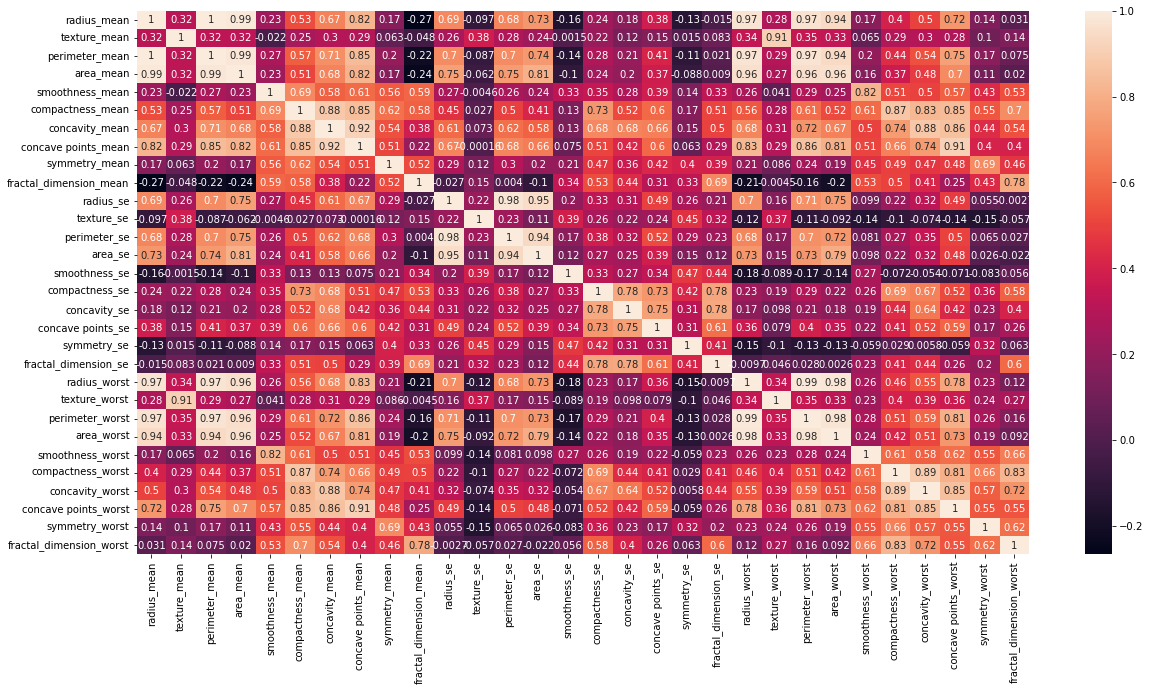

In [26]:
# plotting above co realtion using heat map

plt.figure(figsize =(20,10))
sns.heatmap(X_train.corr(), annot =True)

## ----------------------- Model selection -------------------------------

### 1. Decision tree

In [129]:
## fitting decision tree regressor

reg_tree=DecisionTreeRegressor(max_depth=3,min_samples_leaf=5) #each leaf should have atleast 5 sample -- min obs u want in ur saple
reg_tree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3, min_samples_leaf=5)

In [130]:
# prediction 
y_pred=reg_tree.predict(X_valid)
y_pred

array([0.19512195, 0.        , 0.        , 1.        , 0.        ,
       1.        , 0.        , 1.        , 1.        , 0.93333333,
       0.        , 0.        , 1.        , 0.        , 1.        ,
       0.        , 0.        , 0.19512195, 0.        , 1.        ,
       0.        , 1.        , 0.        , 0.        , 0.        ,
       0.93333333, 0.93333333, 0.        , 0.8       , 0.8       ,
       0.19512195, 1.        , 0.        , 1.        , 0.19512195,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       0.19512195, 0.        , 0.        , 0.        , 0.19512195,
       0.19512195, 1.        , 0.        , 1.        , 1.        ,
       1.        , 0.        , 0.        , 0.4       , 1.        ,
       0.        , 0.        , 0.        , 0.4       , 1.        ,
       0.        , 0.8       , 1.        , 0.        , 0.19512195,
       1.        , 0.        , 1.        , 0.        , 1.        ,
       1.        , 1.        , 0.        , 0.        , 0.     

In [131]:
# checking accuracy 

accuracy_score(y_valid,y_pred.round())

0.9649122807017544

In [132]:
# model performance check

#MAE 
np.mean(np.abs(y_valid-y_pred))

0.06197404079303953

In [133]:
#MSE
np.mean((y_valid-y_pred)**2)

0.029275969353617367

In [136]:
# Hyper parameter tuning choosing best depth

depth=np.arange(1,15)
mae=[]

for k in depth:
    reg_tree=DecisionTreeRegressor(max_depth=k,min_samples_leaf=5)
    reg_tree.fit(X_train,y_train)
    y_pred=reg_tree.predict(X_valid)
    mae.append(np.mean(np.abs(y_valid-y_pred)))  #MAD

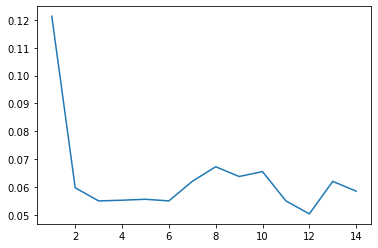

In [137]:
plt.plot(depth,np.array(mae))
plt.show()

##### final testing for Decision tree , from above we see depth should be taken as 12 for that error is min.

In [150]:
reg_tree_fin=DecisionTreeRegressor(max_depth=12,min_samples_leaf=5) 
reg_tree_fin.fit(X_test,y_test)
# prediction 
y_pred_fin=reg_tree_fin.predict(X_test)
MAE=np.mean(np.abs(y_test-y_pred_fin))
MAE

0.04210526315789474

In [151]:
# checking accuracy

accuracy_score(y_test,y_pred_fin.round())

0.9736842105263158

In [152]:
# constructing confusion matrix 
cm = confusion_matrix(y_test, y_pred_fin.round())

Text(24.0, 0.5, 'truth')

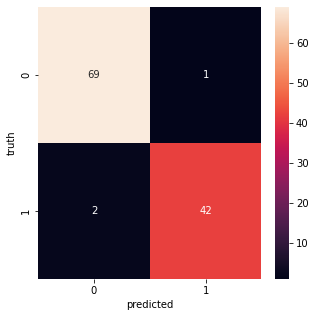

In [153]:
#plotting confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(cm,annot = True)
plt.xlabel('predicted')
plt.ylabel('truth')

###  2. KNN 

In [154]:
## fitting KNN model
knn_classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [155]:
# prediction 
y_pred=knn_classifier.predict(X_valid)
y_pred

array([0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0])

In [156]:
# model performance check

#MAE 
np.mean(np.abs(y_valid-y_pred))

0.05263157894736842

In [157]:
#MSE
np.mean((y_valid-y_pred)**2)

0.05263157894736842

In [158]:
# checking accuracy 

accuracy_score(y_valid,y_pred)

0.9473684210526315

In [159]:
# Hyper parameter tuning choosing best neighbour

neighbor=np.arange(1,20,2)
mae=[]

for k in neighbor:
    knn_classifier=KNeighborsClassifier(n_neighbors = k, metric = 'minkowski', p = 2) # p=1 for manhattan,2 for euclidean
    knn_classifier.fit(X_train,y_train)
    y_pred=knn_classifier.predict(X_valid)
    mae.append(np.mean(np.abs(y_valid-y_pred)))  #MAD

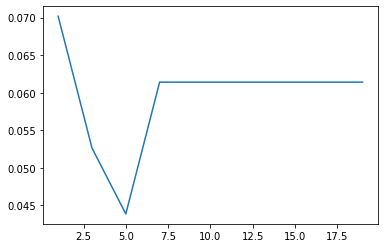

In [160]:
plt.plot(neighbor,np.array(mae))
plt.show()

##### final testing for KNN as we see for 5 neighbour its giving least error 

In [175]:
knn_classifier_fin=KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_classifier_fin.fit(X_test,y_test)
# prediction
y_pred_fin=knn_classifier_fin.predict(X_test)
MAE=np.mean(np.abs(y_test-y_pred_fin))
MAE

0.03508771929824561

In [176]:
# checking accuracy

accuracy_score(y_test,y_pred_fin.round())

0.9649122807017544

In [177]:
# constructing confusion matrix 
cm = confusion_matrix(y_test, y_pred_fin.round())

Text(24.0, 0.5, 'truth')

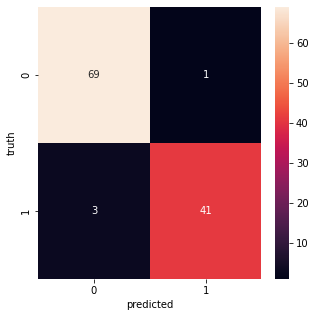

In [178]:
#plotting confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(cm,annot = True)
plt.xlabel('predicted')
plt.ylabel('truth')

### 3. Linear regression

In [113]:
linear_reg=LinearRegression(normalize=True,fit_intercept=True)
linear_reg.fit(X_train,y_train)

C:\Anaconda\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


LinearRegression(normalize=True)

In [114]:
# prediction 
y_pred=linear_reg.predict(X_valid)
y_pred

array([ 0.28873271, -0.20080163,  0.19180663,  1.20551523,  0.17242172,
        0.70169063,  0.19248746,  0.8602408 ,  0.61296769,  0.51505173,
       -0.4496538 ,  0.19482941,  1.04622369,  0.14078717,  1.5189036 ,
        0.23926931,  0.14438912,  0.21223506,  0.05092976,  1.17487692,
       -0.14545554,  0.94286973,  0.3855937 , -0.16429168,  0.07805875,
        0.35244006,  0.29379556,  0.05047584,  0.24954583,  0.33544514,
        0.15198739,  0.59534546,  0.08588193,  0.6335299 ,  0.36759028,
        0.05951657, -0.09240292,  0.22136744,  0.74112875, -0.15588873,
        0.0549819 , -0.24510588,  0.07309858,  0.34565284,  0.22100507,
        0.3078132 ,  0.92415217,  0.33572778,  0.76551299,  0.7106081 ,
        0.98328827,  0.14170144,  0.06890658, -0.0384902 ,  0.9114194 ,
        0.29897359,  0.01175137, -0.18779211,  0.61206419,  1.16000851,
       -0.15119955,  0.55422399,  0.90473412, -0.17441986,  0.12397137,
        0.72664262,  0.25588722,  1.22521662,  0.15167903,  1.31

In [115]:
# model performance check

#MAE 
np.mean(np.abs(y_valid-y_pred))

0.20226751804651194

In [116]:
#MSE
np.mean((y_valid-y_pred)**2)

0.05878285316689184

In [117]:
# calculating r2 score
r2_score(y_valid,y_pred)

0.7473736905565718

In [118]:
# checking accuracy 

accuracy_score(y_valid,y_pred.round())

0.9824561403508771

##### final testing of model

In [182]:
linear_reg_fin=LinearRegression(normalize=True)
linear_reg_fin.fit(X_test,y_test)
# prediction 
y_pred_fin=linear_reg_fin.predict(X_test)
MAE=np.mean(np.abs(y_test-y_pred_fin))
MAE

C:\Anaconda\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


0.17947196267141144

In [183]:
# checking accuracy

accuracy_score(y_test,y_pred_fin.round())

0.9736842105263158

In [184]:
# constructing confusion matrix 
cm = confusion_matrix(y_test, y_pred_fin.round())

Text(24.0, 0.5, 'truth')

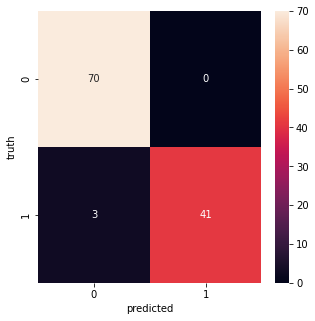

In [185]:
#plotting confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(cm,annot = True)
plt.xlabel('predicted')
plt.ylabel('truth')

## ----------------------------- scaling the data in single unit --------------------------

In [186]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_valid_sc = sc.transform(X_valid)

In [187]:
linear_reg_sc=LinearRegression(normalize=True,fit_intercept=True)
linear_reg_sc.fit(X_train_sc,y_train)
# prediction 
y_pred_sc=linear_reg.predict(X_valid_sc)
y_pred_sc

C:\Anaconda\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


array([ 0.28873271, -0.20080163,  0.19180663,  1.20551523,  0.17242172,
        0.70169063,  0.19248746,  0.8602408 ,  0.61296769,  0.51505173,
       -0.4496538 ,  0.19482941,  1.04622369,  0.14078717,  1.5189036 ,
        0.23926931,  0.14438912,  0.21223506,  0.05092976,  1.17487692,
       -0.14545554,  0.94286973,  0.3855937 , -0.16429168,  0.07805875,
        0.35244006,  0.29379556,  0.05047584,  0.24954583,  0.33544514,
        0.15198739,  0.59534546,  0.08588193,  0.6335299 ,  0.36759028,
        0.05951657, -0.09240292,  0.22136744,  0.74112875, -0.15588873,
        0.0549819 , -0.24510588,  0.07309858,  0.34565284,  0.22100507,
        0.3078132 ,  0.92415217,  0.33572778,  0.76551299,  0.7106081 ,
        0.98328827,  0.14170144,  0.06890658, -0.0384902 ,  0.9114194 ,
        0.29897359,  0.01175137, -0.18779211,  0.61206419,  1.16000851,
       -0.15119955,  0.55422399,  0.90473412, -0.17441986,  0.12397137,
        0.72664262,  0.25588722,  1.22521662,  0.15167903,  1.31

In [188]:
# checking accuracy 

accuracy_score(y_valid,y_pred_sc.round())

0.9824561403508771

In [189]:
MAE=np.mean(np.abs(y_test-y_pred_sc))
MAE

0.5026105534794442